### Importing required Modules

In [1437]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [1438]:
star_data = pd.read_csv('star_data.csv')
star_data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [1439]:
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


### Converting the Spectral Class to Numbers

In [1440]:
d={'O':1, 'B': 2, 'A': 3, 'F':4, 'G':5, 'K': 6, 'M':7}
for i in range(0, len(star_data)):
    cl = star_data.loc[i,'Spectral Class']
    star_data.loc[i,'spec']=d[cl];
star_data['div'] =  star_data['Luminosity(L/Lo)']/star_data['Temperature (K)']

In [1441]:
# these are the features I used to train
features = ['Luminosity(L/Lo)', 'Temperature (K)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)','spec']

In [1442]:
X = star_data[features]
X
#checking the features

,Luminosity(L/Lo),Temperature (K),Radius(R/Ro),Absolute magnitude(Mv),spec
0,0.002400,3068,0.1700,16.12,7.0
1,0.000500,3042,0.1542,16.60,7.0
2,0.000300,2600,0.1020,18.70,7.0
3,0.000200,2800,0.1600,16.65,7.0
4,0.000138,1939,0.1030,20.06,7.0
...,...,...,...,...,...
235,374830.000000,38940,1356.0000,-9.93,1.0
236,834042.000000,30839,1194.0000,-10.63,1.0
237,537493.000000,8829,1423.0000,-10.73,3.0
238,404940.000000,9235,1112.0000,-11.23,3.0


In [1443]:
#this is the prediction
Y = star_data['Star type']#prediction data
Y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

### Using scikit learn KNN model to predict

In [1444]:
#splitting data
#60 : 40 ratio
X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4,  random_state = 0)


In [1445]:
#checking dimension
print(X_train.shape," ",X_test.shape,"\n")
print(y_train.shape, " ", y_test.shape)

(144, 5)   (96, 5) 

(144,)   (96,)


In [1446]:
#scaling the data since KNN uses distance between coordinates
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1447]:
#finding out the best value for the neighbour count by plotting the scores
k_values = [i for i in range(1,31)]
sc = []
X = scaler.fit_transform(X)
i=0
for k in k_values:
        model = KNeighborsClassifier(n_neighbors = k)
        score = cross_val_score(model, X, Y, cv = 5)
        sc.append(np.mean(score))
        #print(sc[i])
        i=i+1
indk = np.argmax(sc)
bestk = k_values[indk]

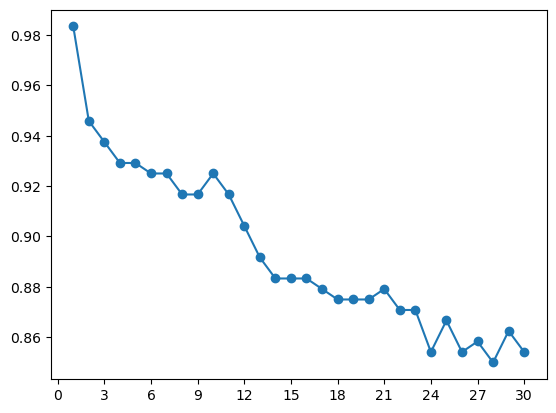

In [1448]:
plt.plot(k_values, sc, marker = 'o')
plt.xticks([i for i in range(0,31,3)])
plt.show()

### Implementing the best values of k

In [1449]:
star_model = KNeighborsClassifier(n_neighbors = bestk)
star_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Verifying the accuracy 

In [1450]:
y_pred = star_model.predict(X_test)
check = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average = 'weighted')
print("accuracy :", check)
print("precision : ", pre)

accuracy : 0.9895833333333334
precision :  0.9901620370370371


### Plotting the scatter plot to visualize the variation
Blue circle mark the actual value while black square marks the predicted value

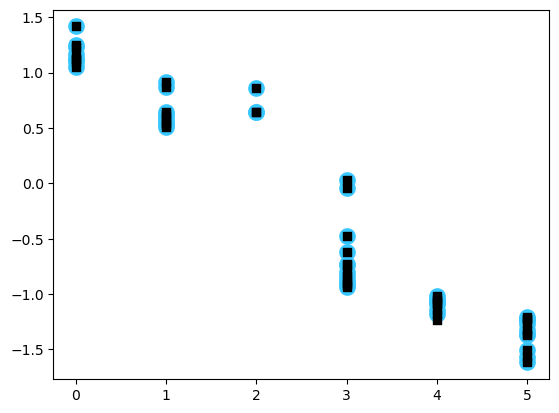

In [1451]:
#plotting the last 50 values
#for  Absolute magnitude(Mv)
plt.scatter(y_test[-50:], X_test[-50:, 3], linewidth = 6, color='#38c7ff')
plt.scatter(y_pred[-50:], X_test[-50:,3] , marker='s',color='#000000', s= 40)
plt.show()

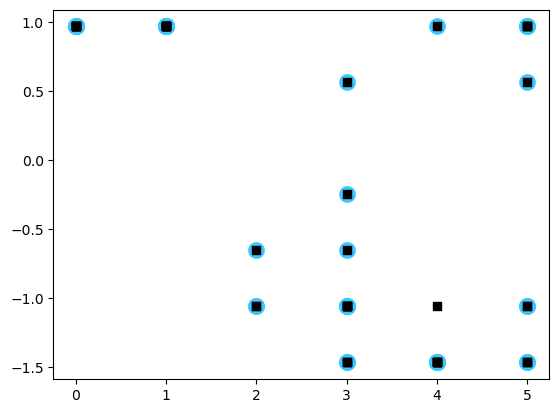

In [1452]:
#plotting the last 50 values
#for spectral values
plt.scatter(y_test[-50:], X_test[-50:,4], linewidth = 6, color='#38c7ff')
plt.scatter(y_pred[-50:], X_test[-50:,4] , marker='s',color='#000000', s= 40)
plt.show()

## Testing the model over whole Data

Accuracy : 0.975


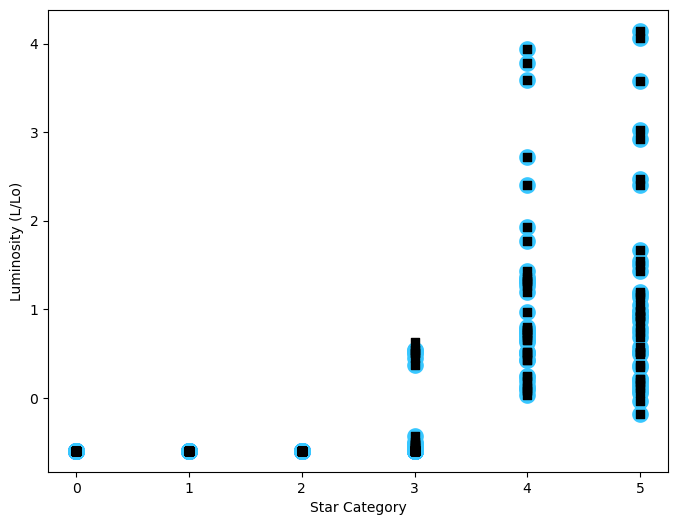

In [1453]:
total_pred = star_model.predict(X)
accuracy = accuracy_score(Y, total_pred)
print('Accuracy :', accuracy)
#scatter plot for all the 240 data inputs
plt.figure(figsize=(8,6))
plt.scatter(Y[:], X[:,0], linewidth = 6, color='#38c7ff')
plt.scatter(total_pred[:], X[:,0] , marker='s',color='#000000', s= 40)
plt.xlabel("Star Category")
plt.ylabel("Luminosity (L/Lo)")
plt.show()